In [86]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt 

In [88]:
#load the data from CSV file (filtered data)
df_ab_test = pd.read_csv("ab_test_click_data.csv")

In [90]:
df_ab_test.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [92]:
df_ab_test.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [94]:
df_ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [96]:
print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.groupby("group").sum("click")) #what is the sum of the clicks per group?

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


In [98]:
#comments: 
#descriptive stats would not be super relevant here. We are interested in the sum of clicks per user. 
#interested in the mean click-through-rate for each group 
#if we had estimates of time spent on the webpage etc, in order to understand the decision process;

ValueError: No axis named exp for object type Series

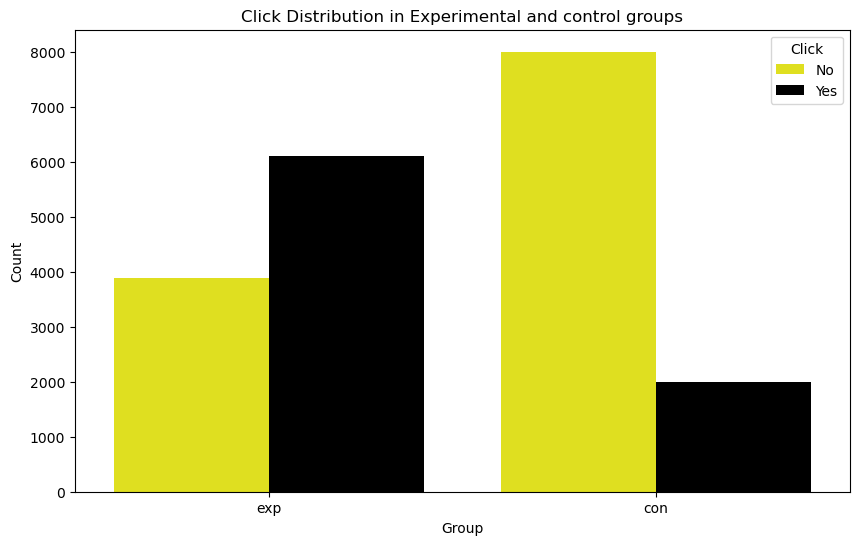

In [100]:
#visualizing the data 
palette = {0: 'yellow', 1: 'black'} #assuming 0 is for no click, 1 for click
#Plotting the click distribution for each group with the custom colors 

plt.figure(figsize=(10,6))
ax = sns.countplot(x='group', hue='click', data=df_ab_test, palette=palette)
plt.title('Click Distribution in Experimental and control groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title="Click", labels=['No', 'Yes'])

#calculate the percentages and annotate the bars 
group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group', 'click']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    #Find the group and click type for the current bar 
    group = 'exp' if p.get_x() < 0.5 else 'con'
    click = 1 if p.get_x() % 1 > 0.5 else 0 
    total = group_counts.loc(group)
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage:.1f}%', ha="center", color='black', fontsize=10)

plt.tight_layout()
plt.show()



In [102]:
#we have a big difference between the experimental and control group; Is the difference 
#between exp and control in terms of click rate? 


In [104]:
alpha = 0.05 
print("Alpha: significance level is", alpha)

delta = 0.1
print("Delta: minimum detectable effect is:", delta) 
#we need to check for practical significance later on;


Alpha: significance level is 0.05
Delta: minimum detectable effect is: 0.1


In [106]:
#calculating total number of clicks per group by summing 1's
#for control and experimental 
N_con = df_ab_test[df_ab_test["group"] == "exp"].count()
N_exp = df_ab_test[df_ab_test["group"] == "con"].count()
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"] 
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"] 

C:\Users\mina1\AppData\Local\Temp\ipykernel_30248\1800262789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='group', y='click', data=df_ab_test, palette = palette)


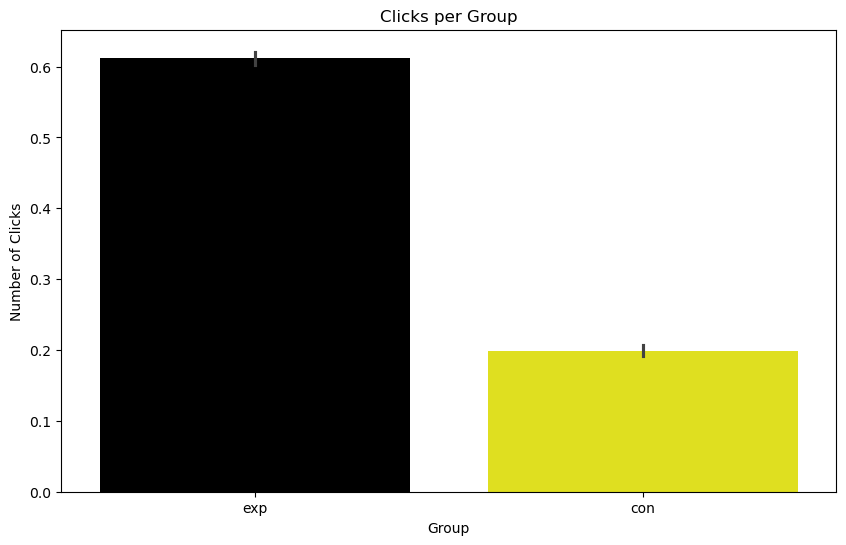

In [108]:
#printing this for visibility: 
plt.figure(figsize=(10,6))
palette = {"con": 'yellow', "exp": 'black'}
ax = sns.barplot(x='group', y='click', data=df_ab_test, palette = palette)
plt.title('Clicks per Group')
plt.xlabel('Group')
plt.ylabel('Number of Clicks')
plt.show()

In [110]:
#Very nice summary analysis of the entire dataset: 
print(df_ab_test.groupby("group")["click"].sum())
print("Number of clicks in Control: ", X_con)
print("Number of clicks in Experimental: ", X_exp) 

group
con    1989
exp    6116
Name: click, dtype: int64
Number of clicks in Control:  1989
Number of clicks in Experimental:  6116


In [112]:
#Caclulating the estimate of click probability per group
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp 
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat) 

#computing the estimate of pooled clicked probability - 
p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
print("Pooled Click Probability:", p_pooled_hat) #this is the mean when we were looking at the 
#descriptive statistics table 

Click Probability in Control Group: user_id      0.1989
click        0.1989
group        0.1989
timestamp    0.1989
dtype: float64
Click Probability in Experimental Group: user_id      0.6116
click        0.6116
group        0.6116
timestamp       inf
dtype: float64
Pooled Click Probability: user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64


In [114]:
#Calculating Pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p(hat) pooled is:", p_pooled_hat)
print("pooled variance is:", pooled_variance)

p(hat) pooled is: user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64
pooled variance is: user_id      0.000048
click        0.000048
group        0.000048
timestamp         inf
dtype: float64


In [142]:
#computing the standard error of the test. We are going with a 2-sample Z-test because we have a 
#large enough sample
SE = np.sqrt(pooled_variance) 
print("Standard Error is:", SE) 
#computing the test statistics of Z-test 
Test_stat = (p_con_hat - p_exp_hat)/SE #when we have a sample > 30 for each of these groups 
print("Test Statistics for 2-sample Z-test is:", Test_stat) 

#critical value for Z-test: 
Z_crit = norm.ppf(1-alpha/2) #ppf - a probability function coming from the normal distribution
print("Z-critical value from Standard Normal distribution:", Z_crit) 



Standard Error is: user_id      0.006943
click        0.006943
group        0.006943
timestamp         inf
dtype: float64
Test Statistics for 2-sample Z-test is: user_id     -59.441633
click       -59.441633
group       -59.441633
timestamp          NaN
dtype: float64
Z-critical value from Standard Normal distribution: 1.959963984540054


In [124]:
#calculating p-value 
#A low p-value (p <= 0.05 at 5% sign level) indicates strong evidence against the null hypothesis 
#A high p-value (p >0.05) indicates weak evidence against the null hypothesis, so we fail to 
#reject it 
p_value = 2 * norm.sf(abs(Test_stat)) #sf - norm function (scipy) 
print(p_value)
#function checking the statistical significance 
def is_statistical_significance(p_value, alpha): 
    #arguments: 
    #p-value (float); The pvalue resulting from a statistical test 
    #alpha (float): The significance level threshold used to determine stat significance 

    if np.all(p_value <= alpha):
         print("We regect the null hypothesis") 
    else: 
        print ("there is no statistical signnificance, suggesting that the observed differences could have occured by chance")
is_statistical_significance(p_value, alpha) 


[ 0.  0.  0. nan]
there is no statistical signnificance, suggesting that the observed differences could have occured by chance


In [130]:
#Params for the standard normal distribution
mu = 0 #Mean
sigma = 1 #standard deviation 
x = np.linspace(mu- 3*sigma, mu + 3 *sigma, 100) #number of x elements on the x-axis
y = norm.pdf(x, mu, sigma) #taking the pdf for the normal distribution function; 

TypeError: unsupported format string passed to Series.__format__

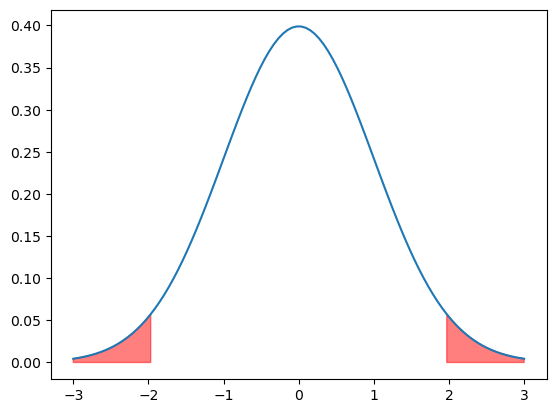

In [140]:
#Plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')
#Shade the reflection region for a two-tailed test 
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color = 'red', alpha = 0.5, label="Rejection Region")
#Adding test statistic 
plt.axvline(Test_stat, color='green', linestyle = 'dashed', linewidth =2, label= f'Test Statistic = {Test_stat:.2f}')
#Adding Z-critical values 
plt.axvline(Z_crit, color = 'blue', linestyle = 'dashed', linewidth =1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color = 'blue', linestyle = 'dashed', linewidth =1)

#Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with regection region \n (A/B testing for CTA button)')
plt.legend()
#Show plot
plt.show()

In [ ]:
#Calculating confidence intervals: 
#calculate the lower and upper bounds of confint 

CI = [
    round((p_exp_hat - p_con_hat) - SE*Z_crit, 3), #Upper bound of conf int
    round((p_exp_hat - p_con_hat) + SE*Z_crit, 3) #lower bound of conf int 
    